# Огавление
1. [Описание проекта](#1)
2. [Открытие данных](#2)
3. [Предобработка данных](#3)
4. [Исследовательский анализ данных](#5)
5. [Общий вывод](#6)

# Описание проекта <a id="1"></a>
## Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. <a id="2"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [2]:
pd.set_option('display.max_columns', 500) #Данную строку я применил из-за того, что таблица не отображалась полностью
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Вывод

В предоставленной таблице 22 столбца.

В некоторых столбцах отстутствуют значения, также некоторым столбцам необходима замена типа данных.

### Шаг 2. Предобработка данных <a id="3"></a>

In [3]:
# Заменим типы данных и устраним пропуски там, где это уместно
data['balcony'] = data['balcony'].fillna(0) # Заполним пропуски в количестве балконов
data['balcony'] = data['balcony'].astype('int') # Заменяем тип данных на целочисленный, т.к. это количество балконов 
data['last_price'] = data['last_price'].astype('int') # цену также заменяем на целочисленный тип, т.к. она указана в рублях
# Заполняем пропущенные значения в высоте потолков на медиану по этому значению во всех домах
# Была идея заполнить пропуски в высоте потолков исходя из типа дома(этажность) на среднее по типу, но как это сделать я не придумал
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())  
# Заменяем тип данных object на datetime в столбце 'first_day_exposition', т.к. это временной формат
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')
# В столбце 'floors_total' было всего 86 пропущенных значений, поэтому было решено просто удалить строки с ними, и также заменить
# тип данных на целочисленный
data.dropna(subset=['floors_total'], inplace = True) 
data['floors_total'] = data['floors_total'].astype('int')
# Для замены пропупусков в столбцах 'living_area' и 'kitchen_area' обратимся к столбцу 'rooms'
# Применим цикл для замены пропусков по категориям
types = data['rooms'].unique()
for i in types:
    median = data[data['rooms'] == i]['living_area'].median()
    data.loc[data['rooms'] == i, 'living_area'] = data.loc[data['rooms'] == i, 'living_area'].fillna(median)
for i in types:
    median = data[data['rooms'] == i]['kitchen_area'].median()
    data.loc[data['rooms'] == i, 'kitchen_area'] = data.loc[data['rooms'] == i, 'kitchen_area'].fillna(median)
# Т.к. почему-то после замены пропусков на медианное значение в 'kitchen_area' у меня все равно остались пропуски в этом столбце
# было принято решение удалить строки, которые их содержат
data.dropna(subset=['kitchen_area'], inplace = True)
# Также были удалены строки, где отсутствовали значения столбца 'locality_name', т.к. для анализа они первостепенны
data.dropna(subset=['locality_name'], inplace = True)
# Также были удалены строки, где отсутствовали значения столбца 'days_exposition', т.к. я считаю, что заменять данные значения
# основываясь на других бессмыслено
data.dropna(subset=['days_exposition'], inplace = True)
data['days_exposition'] = data['days_exposition'].astype('int')



/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20214 entries, 1 to 23697
Data columns (total 22 columns):
total_images            20214 non-null int64
last_price              20214 non-null int64
total_area              20214 non-null float64
first_day_exposition    20214 non-null datetime64[ns]
rooms                   20214 non-null int64
ceiling_height          20214 non-null float64
floors_total            20214 non-null int64
living_area             20214 non-null float64
floor                   20214 non-null int64
is_apartment            2479 non-null object
studio                  20214 non-null bool
open_plan               20214 non-null bool
kitchen_area            20214 non-null float64
balcony                 20214 non-null int64
locality_name           20214 non-null object
airports_nearest        15626 non-null float64
cityCenters_nearest     15648 non-null float64
parks_around3000        15648 non-null float64
parks_nearest           6862 non-null float64
ponds_around3

### Вывод


######  Все пропуски в столбцах нужных для анализа были заполнены, а типы данных изменены на подходящие

Столбцы с картографическими данным не были изменены, т.к. в задании они не упоминаются, за исключением столбца 'cityCenters_nearest', но к нему мы обратимся позже

### Шаг 3. Посчитайте и добавьте в таблицу <a id="4"></a>

- цену квадратного метра
- день недели, месяц и год публикации объявления
- этаж квартиры; варианты — первый, последний, другой
- соотношение жилой и общей площади, а также отношение площади кухни к общей

In [5]:
# Добавим требуемые столбцы
data['price_per_sq'] = data['last_price'] / data['total_area']
data['price_per_sq'] = data['price_per_sq'].astype('int')
data['week_day'] = data['first_day_exposition'].dt.weekday #день нед.
data['year'] = data['first_day_exposition'].dt.year #год
data['month'] = data['first_day_exposition'].dt.month #месяц
data['living_total'] = data['living_area'] / data['total_area']
data['kitchen_total'] = data['kitchen_area'] / data['total_area']

# Напишем функцию для определения статуса этажа(первый, последний, другой) и применим её.
def floor_status(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    return 'другой'
data['floor_status'] = data.apply(floor_status, axis=1)

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sq,week_day,year,month,living_total,kitchen_total,floor_status
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,NaN,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81,82920,1,2018,12,0.460396,0.272277,первый
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,NaN,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,92785,3,2015,8,0.612500,0.148214,другой
3,0,64900000,159.0,2015-07-24,3,2.65,14,45.0,9,NaN,False,False,9.5,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424,408176,4,2015,7,0.283019,0.059748,другой
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,100000,1,2018,6,0.320000,0.410000,другой
5,10,2890000,30.4,2018-09-10,1,2.65,12,14.4,5,NaN,False,False,9.1,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55,95065,0,2018,9,0.473684,0.299342,другой


### Шаг 4. Исследовательский анализ данных  <a id="5"></a>

#### Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

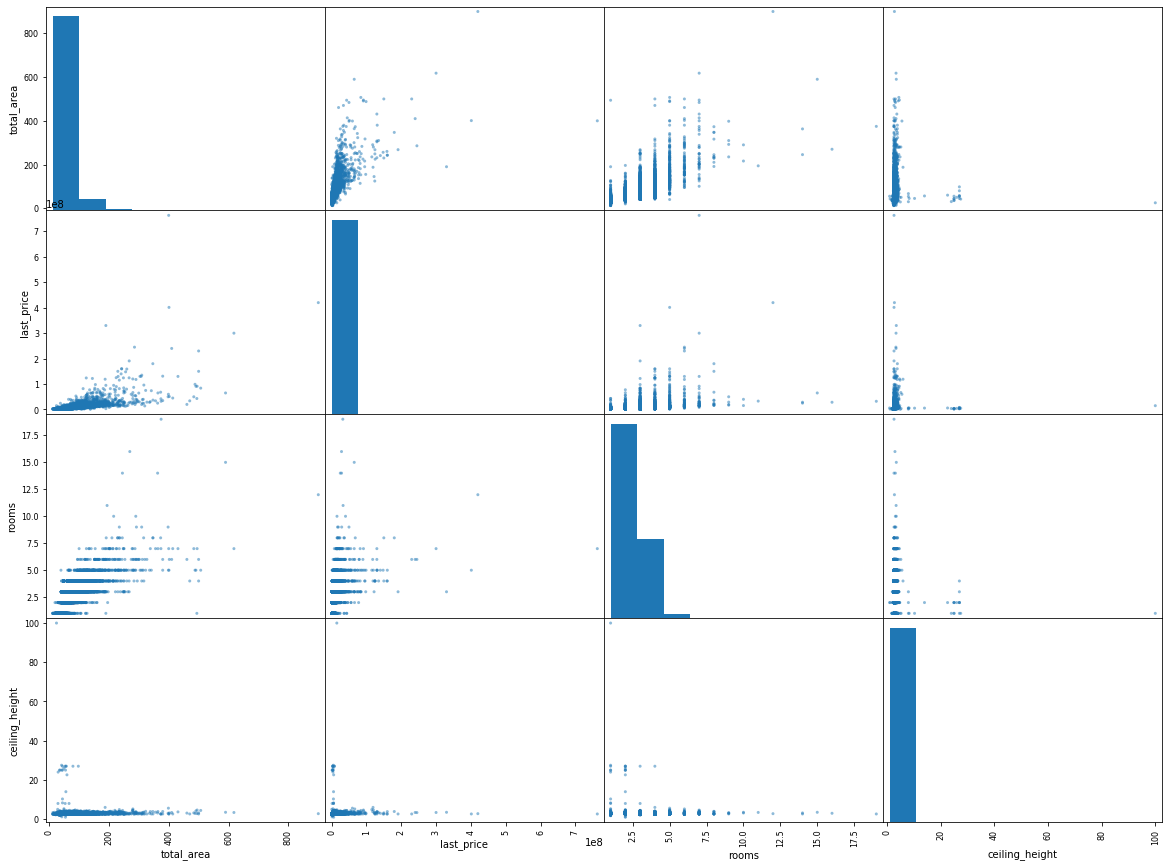

In [6]:
#cоздадим переменную bad_stat для создания матрицы на исходных данных
bad_stat = data[['total_area','last_price','rooms','ceiling_height']]
pd.plotting.scatter_matrix(bad_stat,figsize=(20,15))
plt.show()


### Вывод

Как можно заметить данные подвержены выбросам из-за чего визуальный точный анализ этих данных с помощью pd.plotting.scatter_matrix практически невозможен, поэтому, рассмотрим нужные нам столбцы детальнее:

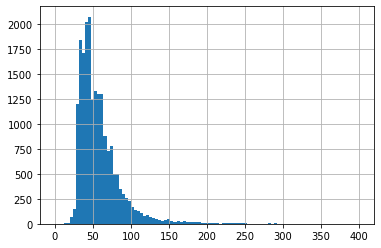

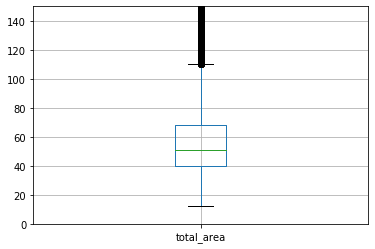

In [7]:
# Построим гистограму и ящик с усами для столбца ['total_area']
data['total_area'].hist(bins = 100, range = (0,400))
plt.show()
data.boxplot(column = ['total_area'])
plt.ylim(0, 150)
plt.show()
rf = data['total_area'].describe()


Как можно заметить гистограма похожа на нормальное распределение, наиболее чаще встречающаяся площадь квартиры примерно равна 50 метрам, а верхний ус ящика кончается примерно на 110 метрах

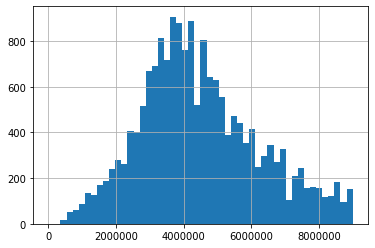

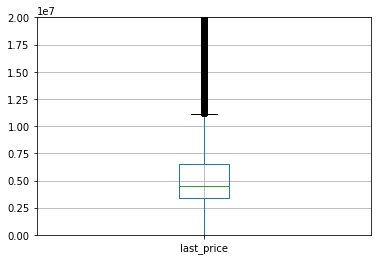

In [8]:
# Построим гистограму и ящик с усами для столбца ['last_price']
data['last_price'].hist(bins = 50, range = (0, 9000000))
plt.show()
data.boxplot(column = ['last_price'])
plt.ylim(0, 20000000)
plt.show()

Как можно заметить гистограма также похожа на нормальное распределение, наиболее чаще встречающаяся цена квартиры примерно равна 4 миллионам, а верхний ус ящика кончается примерно на 10 миллионах

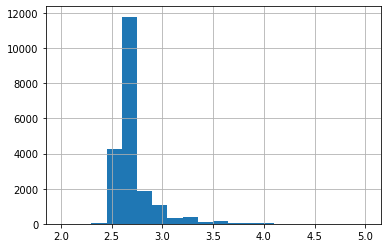

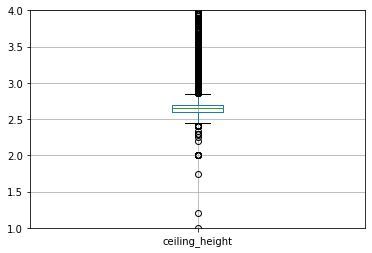

In [9]:
# Построим гистограму и ящик с усами для столбца ['ceiling_height']
data['ceiling_height'].hist(bins = 20, range = (2, 5))
plt.show()
data.boxplot(column = ['ceiling_height'])
plt.ylim(1, 4)
plt.show()


Как можно заметить, в данном столбце ящик с усами имеет выбросы и сверху и снизу, это обязательно нужно учесть

### Вывод

Мы убедились, что данные обладают достаточной правдоподобностью, но при этом подвержены выбросам, от которых нужно избавится

### Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

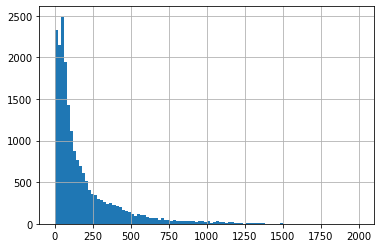

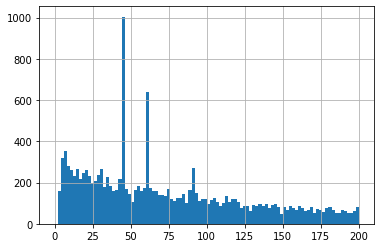

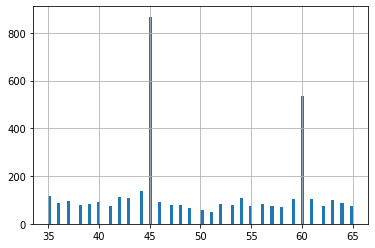

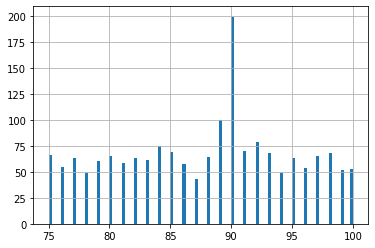

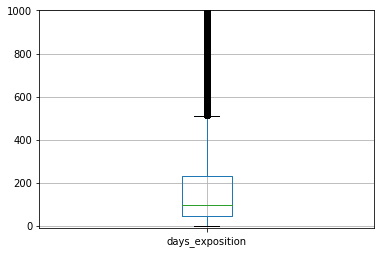

count    20214.000000
mean       181.368458
std        220.094368
min          1.000000
25%         45.000000
50%         96.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [10]:
# Построим диаграму для столбца ['days_exposition']
data['days_exposition'].hist(bins = 100, range = (0, 2000))
plt.show()
# Увеличим масштаб
data['days_exposition'].hist(bins = 100, range = (0, 200))
plt.show()
# Увеличим масштаб
data['days_exposition'].hist(bins = 100, range = (35, 65))
plt.show()
# Увеличим масштаб
data['days_exposition'].hist(bins = 100, range = (75, 100))
plt.show()
# Построим ящик с усами
data.boxplot(column = ['days_exposition'])
plt.ylim(-10, 1000)
plt.show()
data['days_exposition'].describe()


### Вывод

Среднее - 181
Медиана - 96
Медиана практически в 2 раза меньше среднего, да и стандартное отклонение достаточно большое, что говорит об аномальных значениях в выборке, что собственно и подтверждено диаграммами.

Совпадение или ошибка? - неизвестно, но больше всего квартир продается на 45, 60 и 90 день с момента публикации на сайте.

Если квартиру продали быстрее, чем за 45 дней, можно считать, что продали её быстро, ну а если продажа займёт больше 232 дней, то это необычно долго.

#### Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

In [11]:
# Для определения границы верхнего уса диаграммы размаха напишем функцию и применим к нужным столбцам
def top_wisk_cap(column):
    p1 = data[column].describe()
    p2 = p1['75%'] + 1.5*(p1['75%'] - p1['25%'])
    return p2

print(top_wisk_cap('total_area'))
print(top_wisk_cap('last_price'))
print(top_wisk_cap('rooms'))
print(top_wisk_cap('ceiling_height'))
print(top_wisk_cap('days_exposition'))

# Выше мы заметили, что ящик с усами для столбца ('ceiling_height') также имеет выбросы за границей нижнего уса
# Для определения границы нижнего уса диаграммы размаха напишем функцию и применим к нужным столбцам
def bottom_wisk_cap(column):
    p1 = data[column].describe()
    p2 = p1['25%'] - 1.5*(p1['75%'] - p1['25%'])
    return p2
print(bottom_wisk_cap('ceiling_height'))

# С помощью среза присвоим обновленную таблицу новой переменной good_data
good_data = data.query('total_area < 110 and last_price < 11150000 and rooms < 6 and 2.45 < ceiling_height < 2.85')




110.0
11150000.0
6.0
2.8500000000000005
512.5
2.45


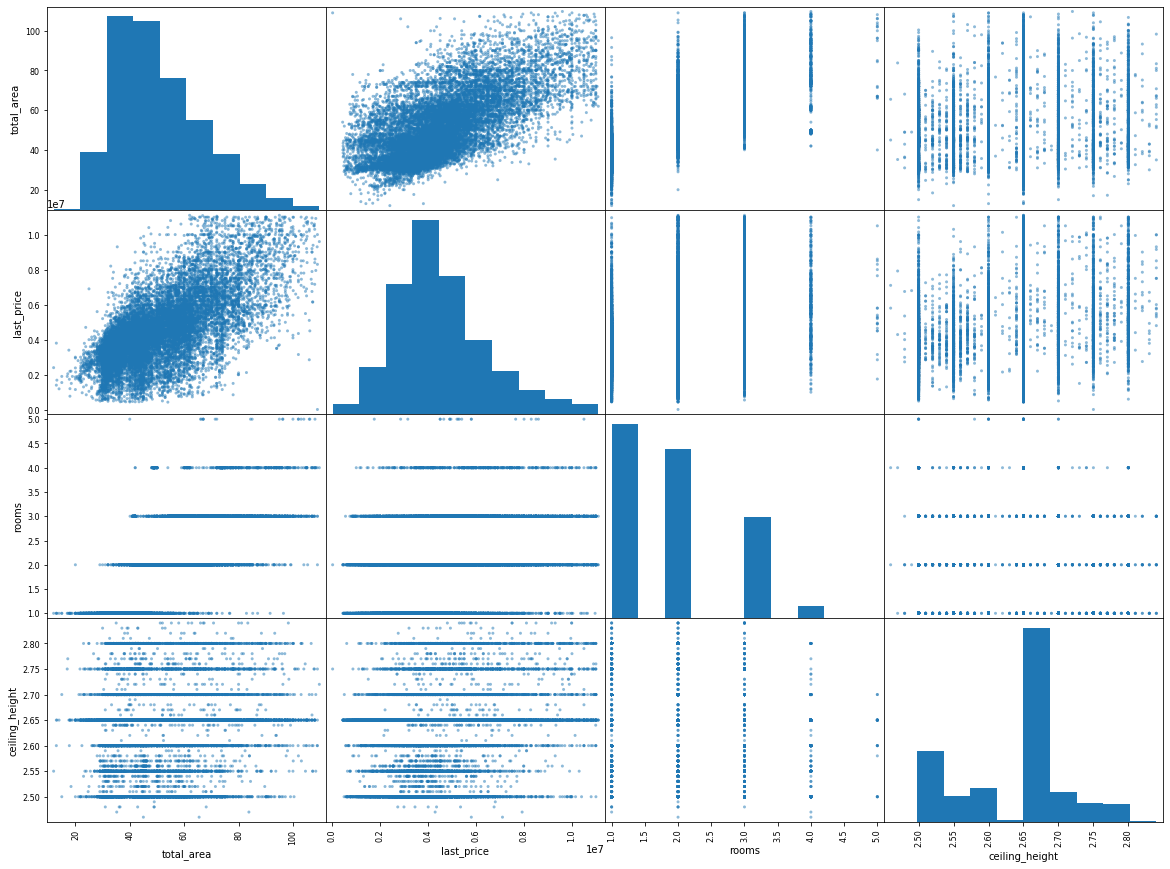

In [12]:
#cоздадим переменную good_stat для создания матрицы на обновленных данных данных
good_stat = good_data[['total_area','last_price','rooms','ceiling_height']]
pd.plotting.scatter_matrix(good_stat,figsize=(20,15))
plt.show()


### Вывод

Совсем другое дело, от выбросов избавились, картина полная и пригодная для визуального анализа

### Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года.

In [13]:
# Создадим таблицу корреляций интересующих нас столбцов
good_data[['last_price', 'total_area', 'rooms', 'floor','cityCenters_nearest', 'week_day', 'month', 'year']].corr()

,last_price,total_area,rooms,floor,cityCenters_nearest,week_day,month,year
last_price,1.000000,0.673492,0.405692,0.194001,-0.307870,-0.003814,0.012506,-0.009568
total_area,0.673492,1.000000,0.798462,0.005442,-0.067048,-0.006106,0.008264,-0.079626
rooms,0.405692,0.798462,1.000000,-0.163972,-0.027971,-0.004311,0.002745,-0.058242
floor,0.194001,0.005442,-0.163972,1.000000,-0.056328,0.009293,0.016576,0.016298
cityCenters_nearest,-0.307870,-0.067048,-0.027971,-0.056328,1.000000,-0.001451,-0.015053,0.014630
week_day,-0.003814,-0.006106,-0.004311,0.009293,-0.001451,1.000000,0.008810,0.007080
month,0.012506,0.008264,0.002745,0.016576,-0.015053,0.008810,1.000000,-0.198994
year,-0.009568,-0.079626,-0.058242,0.016298,0.014630,0.007080,-0.198994,1.000000


### Вывод


| column               | corr                 | comment         |
| :------------------- | -------------------: |:---------------:|
| total_area           | 0.673492  | Больше всего на цену влияет общая площадь квартиры, что в принципе логично  |
| rooms                | 0.405692  | Также существует приличная корелляция с количеством комнат            |
| floor                | 0.194001  |С этажом также существует хоть незначительная, но корелляция|
| cityCenters_nearest  |-0.307870  |С удаленностью от центра корляция отрицательная, что означает, что чем меньше цена, то тем дальше, квартира распологается от центра|
| week_day             |-0.003814| Корреляционной связи нет|
| month                | 0.012506  |С месяцем существует очень незначительная корреляция|
| year                 |-0.009568|Корреляционной связи нет|

- Больше всего на стоимость квартиры влияет её площадь, количество комнат и удалённость от центра

#### Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.

In [14]:
# Создадим переменную top10, где с помощью сводной таблицы посчитаем количество объявлений и отсортируем в порядке убывания
# методом head(10) выберем первые 10
top10 = (
    good_data.pivot_table(index = 'locality_name', values='last_price',aggfunc='count')
    .sort_values('last_price',ascending = False).head(10)
)
# Создадим новую переменную top10_in, где с помозью среза передадим из good_data строки с населенными пунктами из top10
top10_in = good_data.query('locality_name in @top10.index')
# Создадим новую переменную top10_price, где также с помощью сводной таблицы 
# посчитаем среднюю цену квадратного метра в этих населённых пунктах и отсортируем по убыванию цены
top10_price = (
    top10_in.pivot_table(index = ['locality_name'], values='price_per_sq',aggfunc='mean')
    .sort_values('price_per_sq',ascending = False).head(10)
)
top10_price

,price_per_sq
locality_name,
Санкт-Петербург,103185.174237
Пушкин,99028.207031
деревня Кудрово,92346.620072
посёлок Парголово,89830.210884
посёлок Мурино,84998.550000
посёлок Шушары,77575.595420
Колпино,74829.692042
Гатчина,67849.012048
Всеволожск,66776.627329


Самая высокая стоимость за квадратный метр в Санкт-Петербурге, а самая низкая в Выборге

#### Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. 
#### Выделите квартиры в Санкт-Петербурге ('locality_name').
Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/s

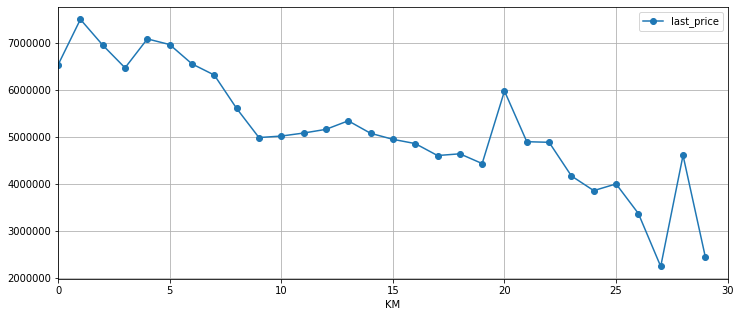

In [15]:
# Создадим новую переменную stat_saintp, где с помощью среза передадим в нее только те, строки good_data,
#  где locality_name = "Санкт-Петербург"
stat_saintp = good_data.query('locality_name == "Санкт-Петербург"')
# Создадим столбец с расстоянием до центра в километрах, заполним пропуски и изменим тип данных на целочисленный
stat_saintp['KM'] = stat_saintp['cityCenters_nearest'] / 1000
stat_saintp['KM'] = stat_saintp['KM'].fillna(0)
stat_saintp['KM'] = stat_saintp['KM'].astype(int)
# С помощью сводной таблицы и графика покажем, как цена зависит от удаленности до центра
stat_saintp.pivot_table(index = 'KM', values = 'last_price', aggfunc = 'mean').plot(style = 'o-',
                                                                                    grid = True,figsize=(12, 5),xlim=(0, 30))
# А еще вылезает огромное предупреждение пандаса, не знаю, что с ним делать, но все работает


### Вывод

Судя по графику, резкий скачек цены начинается с 9 километра до центра, собственно от него мы и будем считать центр города

#### Выделите сегмент квартир в центре. 
Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

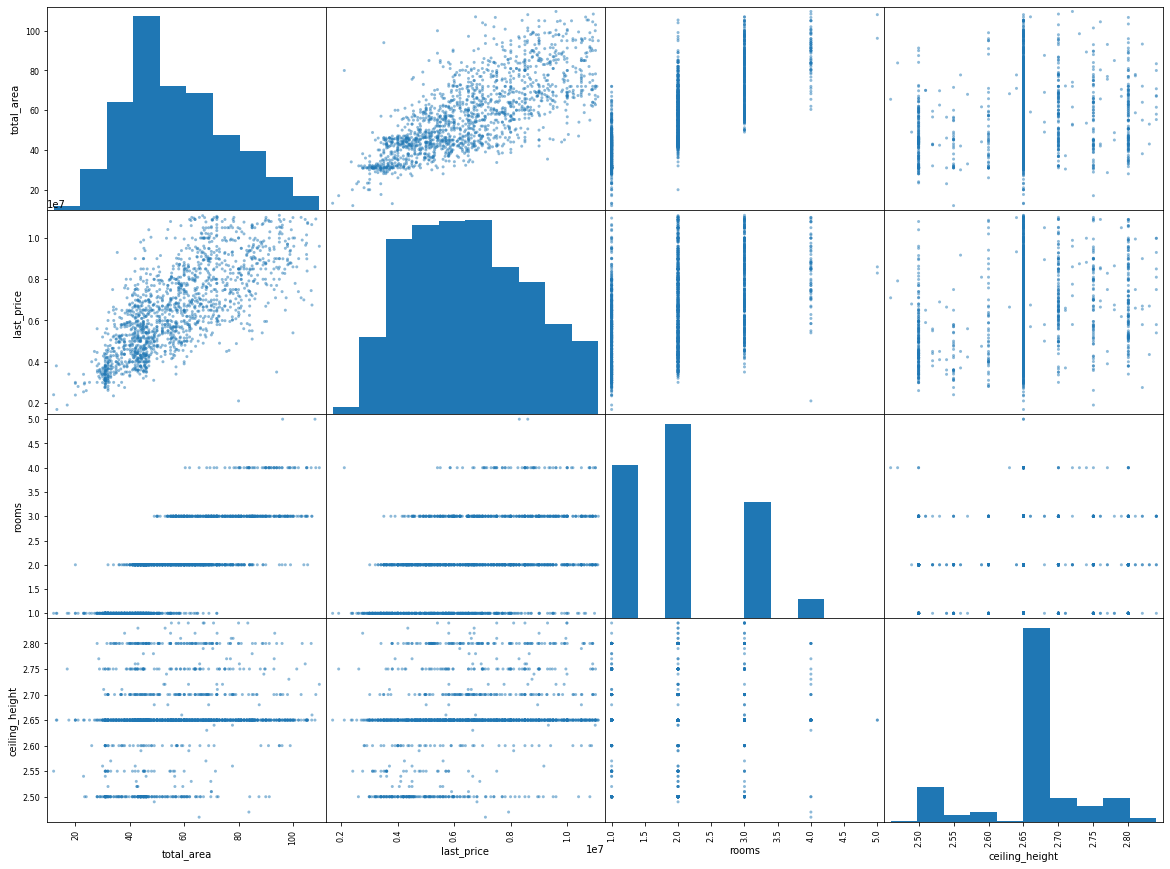

In [16]:
# Создадим новую переменную center и с помощью среза передадим в нее только те строки, где KM < 9
center = stat_saintp.query('KM < 9')
# Создадим переменную center_stat для создания матрицы для центра Санкт-Петербурга
center_stat = center[['total_area','last_price','rooms','ceiling_height']]
pd.plotting.scatter_matrix(center_stat,figsize=(20,15))
plt.show()

In [17]:
center[['last_price', 'total_area', 'rooms', 'floor','cityCenters_nearest', 'week_day', 'month', 'year', 'ceiling_height']].corr()

,last_price,total_area,rooms,floor,cityCenters_nearest,week_day,month,year,ceiling_height
last_price,1.000000,0.732149,0.431976,0.149850,-0.238997,0.043939,0.030583,-0.058589,0.260045
total_area,0.732149,1.000000,0.780571,-0.034543,-0.233621,0.031606,0.055469,-0.137149,0.182716
rooms,0.431976,0.780571,1.000000,-0.150857,-0.183867,0.013644,0.042109,-0.077390,0.016958
floor,0.149850,-0.034543,-0.150857,1.000000,0.244729,0.045790,0.014156,0.049163,0.108017
cityCenters_nearest,-0.238997,-0.233621,-0.183867,0.244729,1.000000,0.003460,-0.017635,0.137946,-0.178136
week_day,0.043939,0.031606,0.013644,0.045790,0.003460,1.000000,0.040825,0.032612,0.007770
month,0.030583,0.055469,0.042109,0.014156,-0.017635,0.040825,1.000000,-0.172261,-0.007801
year,-0.058589,-0.137149,-0.077390,0.049163,0.137946,0.032612,-0.172261,1.000000,-0.089099
ceiling_height,0.260045,0.182716,0.016958,0.108017,-0.178136,0.007770,-0.007801,-0.089099,1.000000


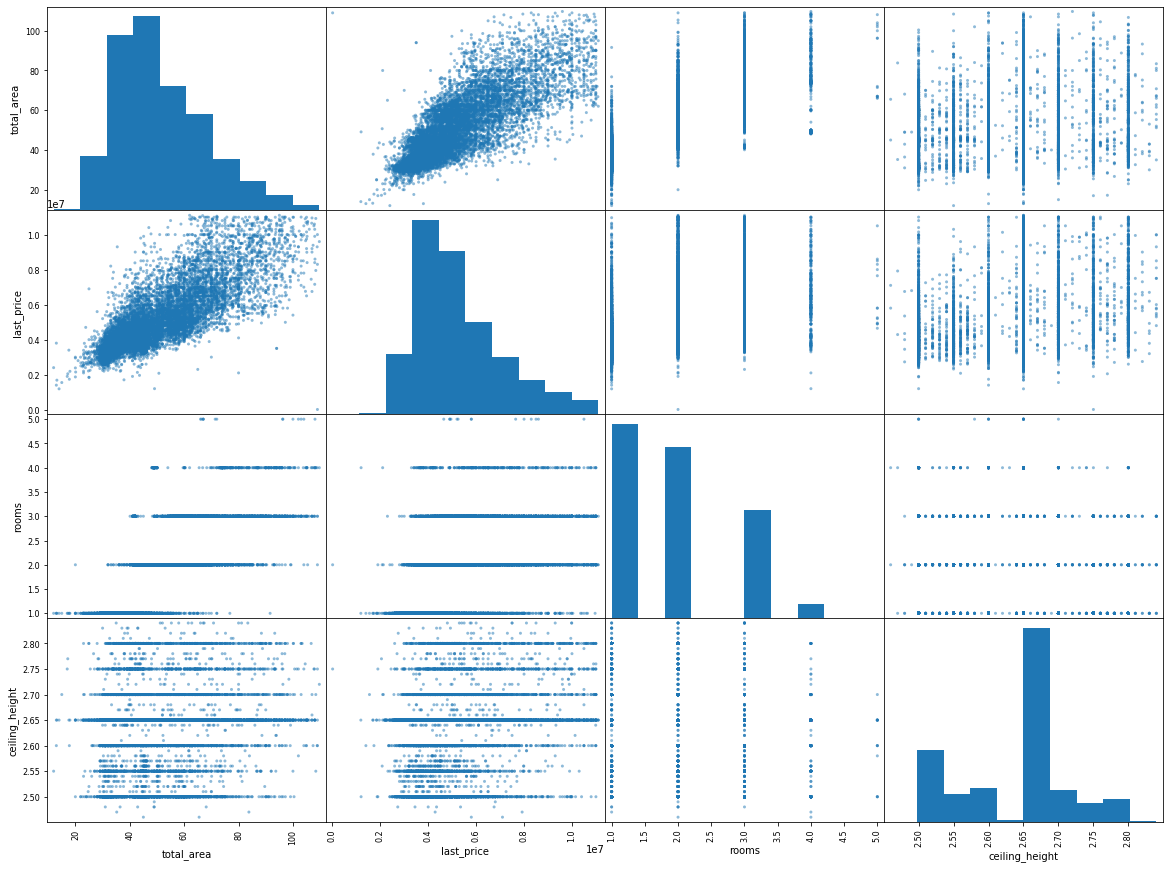

,total_area,last_price,rooms,ceiling_height
total_area,1.000000,0.785649,0.784665,0.157587
last_price,0.785649,1.000000,0.474779,0.275562
rooms,0.784665,0.474779,1.000000,-0.102798
ceiling_height,0.157587,0.275562,-0.102798,1.000000


In [18]:
alsaintp = stat_saintp[['total_area','last_price','rooms','ceiling_height']]
pd.plotting.scatter_matrix(alsaintp,figsize=(20,15))
plt.show()
alsaintp.corr()

### Вывод

Сравнив графики можно заметить, что в центре Санкт-Петербурга преобладают квартиры с площадью от 40 до 50 метров, в то время, как во всем городе наряду с 50 квадратными квартирами популярны и 30 - 40 квадратные.

В центре наиболее часто встречающаяся стоимость квартир составляет от 4 до 7 миллионов, в то время, как во всем городе наиболее часто встречающаяся стоимость составляет от 3.5 до 4.5 миллинов

В центре и в городе, корреляции параметров квартиры и её цены практически одинаковы

Во всем городе преоблодают однакомнатные квартиры, а в центре - двухкомнатные


### Шаг 5. Общий вывод <a id="6"></a>

#### В предоставленной для анализа таблице в некоторых столбцах отстутствовали значения, также некоторым столбцам была необходима замена типа данных.

- Все пропуски в столбцах нужных для анализа были заполнены, а типы данных изменены на подходящие
  Столбцы с картографическими данным не были изменены, т.к. в задании они не упоминаются, за исключением столбца    'cityCenters_nearest'

- При построении диаграм выяснилось, что данные подвержены выбросам из-за чего визуальный точный анализ этих данных практически невозможен, поэтому, нужно избавится от выбросов, что и было сделано

#### После этого был произведён анализ, который показал, что :
- Наиболее чаще встречающаяся площадь квартиры в Санкт-Петербурге и соседних населённых пунктах примерно равна 50 метрам.

- Наиболее чаще встречающаяся цена квартиры примерно равна 4 миллионам.

#### При рассмотрении времени продажи квартиры было выявлено, что:   
- Если квартиру продали быстрее, чем за 45 дней, можно считать, что продали её быстро, ну а если продажа займёт больше 232 дней, то это необычно долго.


#### Также было обнаружено, что:
- Больше всего на стоимость квартиры влияет её площадь, количество комнат и удалённость от центра

- Из топ-10 городов по количеству объявлений о продаже квартир - самая высокая стоимость за квадратный метр в Санкт-Петербурге, а самая низкая в Выборге

#### Заметив на графике, что резкий скачек цен на квартиры начинается после 9 километра до центра, был произведен сравнительный анализ параметров квартир во всем городе, и, соответственно, в его центре.

- Сравнив графики было обнаружено, что в центре Санкт-Петербурга преобладают квартиры с площадью от 40 до 50 метров, в то время, как во всем городе наряду с 50 квадратными квартирами популярны и 30 - 40 квадратные.

- В центре наиболее часто встречающаяся стоимость квартир составляет от 4 до 7 миллионов, в то время, как во всем городе наиболее часто встречающаяся стоимость составляет от 3.5 до 4.5 миллинов

- В центре и в городе, корреляции параметров квартиры и её цены практически одинаковы

- Во всем городе преоблодают однакомнатные квартиры, а в центре - двухкомнатные